In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from pandas.api.types import CategoricalDtype


In [2]:
file = "太田クラウドソーシング2回目_3589034772.tsv"
df = pd.read_csv(file, sep='\t')


In [3]:
df_Q1 = df[df['Q_ID'] == 1]
df_Q2 = df[df['Q_ID'] == 2]
df_Q3 = df[df['Q_ID'] == 3]
df_Q5 = df[df['Q_ID'] == 5]
df_Q6 = df[df['Q_ID'] == 6]
df_Q7 = df[df['Q_ID'] == 7]
df_Q8 = df[df['Q_ID'] == 8]

total_rows_Q1 = df_Q1.shape[0]
total_rows_Q2 = df_Q2.shape[0]
total_rows_Q3 = df_Q3.shape[0]
total_rows_Q5 = df_Q5.shape[0]
total_rows_Q6 = df_Q6.shape[0]
total_rows_Q7 = df_Q7.shape[0]
total_rows_Q8 = df_Q8.shape[0]

In [16]:
answer_percentage_Q1 = df_Q1.groupby("Answer").size().div(
    total_rows_Q1).mul(100).round(2).reset_index(name='percentage')
answer_num_Q1_t = df_Q1.groupby(
    "Answer").size().reset_index(name='num_of_rows')
answer_percentage_Q1_new = pd.merge(
    answer_percentage_Q1, answer_num_Q1_t, on='Answer')
answer_percentage_Q1_new


,Answer,percentage,num_of_rows
0,その他,0.4,4
1,女性,35.2,352
2,男性,64.4,644


/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_32128/2247397519.py:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 400, 50)


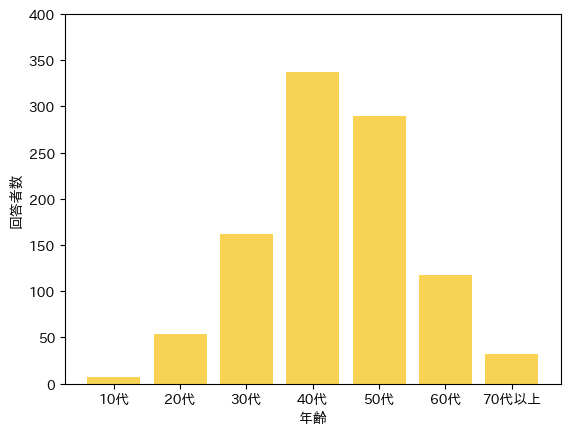

In [5]:
answer_percentage_Q2 = df_Q2.groupby("Answer").size().div(
    total_rows_Q2).mul(100).round(2).reset_index(name='percentage')
answer_num_Q2_t = df_Q2.groupby(
    "Answer").size().reset_index(name='num_of_rows')
answer_percentage_Q2_new = pd.merge(
    answer_percentage_Q2, answer_num_Q2_t, on='Answer')
answer_percentage_Q2_new

plt.bar(answer_percentage_Q2_new["Answer"],
        answer_percentage_Q2_new["num_of_rows"], color='#F8D353')
plt.xlabel("年齢")
plt.ylabel("回答者数")
plt.ylim(0, 400, 50)
# plt.subplots_adjust(bottom=0.25)
plt.show()


/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_32128/1123690979.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q3['Region'] = df_Q3['Answer'].map(
/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_32128/1123690979.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q3['Region'] = df_Q3['Region'].astype(cat_type)
/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_32128/1123690979.py:32: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positional

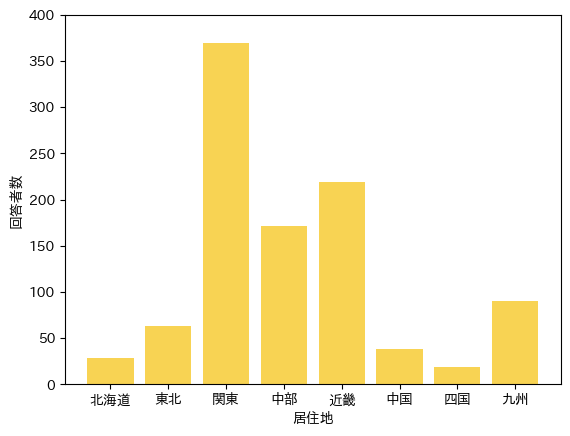

In [6]:
answer_percentage_Q3 = df_Q3.groupby("Answer").size().div(
    total_rows_Q3).mul(100).round(2).reset_index(name='percentage')
region_map = {'北海道': ['北海道'],
              '東北': ['青森', '岩手', '宮城', '秋田', '山形', '福島'],
              '関東': ['茨城', '栃木', '群馬', '埼玉', '千葉', '東京', '神奈川'],
              '中部': ['新潟', '富山', '石川', '福井', '山梨', '長野', '岐阜', '静岡', '愛知'],
              '近畿': ['三重', '滋賀', '京都', '大阪', '兵庫', '奈良', '和歌山'],
              '中国': ['鳥取', '島根', '岡山', '広島', '山口'],
              '四国': ['徳島', '香川', '愛媛', '高知'],
              '九州': ['福岡', '佐賀', '長崎', '熊本', '大分', '宮崎', '鹿児島', '沖縄']}
df_Q3['Region'] = df_Q3['Answer'].map(
    lambda x: [key for key, value in region_map.items() if x in value][0])

region_order = ['北海道', '東北', '関東', '中部', '近畿', '中国', '四国', '九州']
cat_type = CategoricalDtype(categories=region_order, ordered=True)
df_Q3['Region'] = df_Q3['Region'].astype(cat_type)
df_Q3 = df_Q3.sort_values(by='Region')

region_percentage_Q3 = df_Q3.groupby("Region").size().div(
    total_rows_Q3).mul(100).round(2).reset_index(name='percentage')
answer_num_Q3_t = df_Q3.groupby(
    "Region").size().reset_index(name='num_of_rows')
answer_percentage_Q3_new = pd.merge(
    region_percentage_Q3, answer_num_Q3_t, on='Region')
answer_percentage_Q3_new


plt.bar(answer_percentage_Q3_new["Region"],
        answer_percentage_Q3_new["num_of_rows"], color='#F8D353')
plt.xlabel("居住地")
plt.ylabel("回答者数")
plt.ylim(0, 400, 50)
# plt.subplots_adjust(bottom=0.25)
plt.show()


/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_32128/1577428692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q5['Time'] = df_Q5['Answer'].astype(cat_type)
/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_32128/1577428692.py:21: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 350, 50)


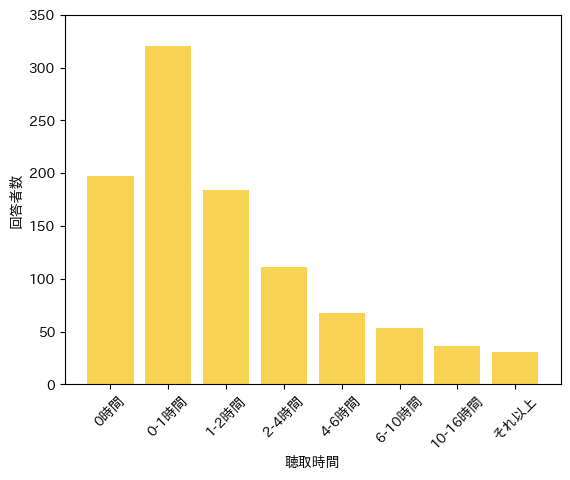

In [7]:
# 音声メディア(Podcast、らじるらじる、radiko、Audee、Audible、静止画で音声だけが流れるYouTubeなど)を週に合計何時間聴きますか。
# 0時間@0-1時間@1-2時間@2-4時間@4-6時間@6-10時間@10-16時間@それ以上
time_order = ['0時間', '0-1時間', '1-2時間', '2-4時間',
              '4-6時間', '6-10時間', '10-16時間', 'それ以上']
cat_type = CategoricalDtype(categories=time_order, ordered=True)
df_Q5['Time'] = df_Q5['Answer'].astype(cat_type)
df_Q5 = df_Q5.sort_values(by='Time')

answer_percentage_Q5 = df_Q5.groupby("Time").size().div(
    total_rows_Q5).mul(100).round(2).reset_index(name='percentage')
answer_num_Q5_t = df_Q5.groupby(
    "Time").size().reset_index(name='num_of_rows')
answer_percentage_Q5_new = pd.merge(
    answer_percentage_Q5, answer_num_Q5_t, on='Time')

plt.bar(answer_percentage_Q5_new["Time"],
        answer_percentage_Q5_new["num_of_rows"], color='#F8D353')
plt.xlabel("聴取時間")
plt.ylabel("回答者数")
plt.xticks(rotation=45)
plt.ylim(0, 350, 50)
# plt.subplots_adjust(bottom=0.25)
plt.show()


In [8]:
answer_percentage_Q5_new


,Time,percentage,num_of_rows
0,0時間,19.7,197
1,0-1時間,32.0,320
2,1-2時間,18.4,184
3,2-4時間,11.1,111
4,4-6時間,6.8,68
5,6-10時間,5.3,53
6,10-16時間,3.6,36
7,それ以上,3.1,31


In [9]:
no_listening_id = df[(df['Q_ID'] == 5) & (
    df['Answer'] == '0時間')]['Answerer_ID'].tolist()

In [10]:
# 音声メディア(Podcast、らじるらじる、Audee、Audible、静止画で音声だけが流れるYouTubeなど)の聴取に倍速機能を使いますか。
# はい@いいえ
answer_percentage_Q6 = df_Q6.groupby("Answer").size().div(
    total_rows_Q6).mul(100).round(2).reset_index(name='percentage')
answer_percentage_Q6


,Answer,percentage
0,いいえ,70.0
1,はい,30.0


In [11]:
df_Q6_t = df_Q6[~(df_Q6["Answerer_ID"].isin(no_listening_id))]
total_rows_Q6_t = df_Q6_t.shape[0]
answer_percentage_Q6_t = df_Q6_t.groupby("Answer").size().div(
    total_rows_Q6_t).mul(100).round(2).reset_index(name='percentage')
answer_num_Q6_t = df_Q6_t.groupby(
    "Answer").size().reset_index(name='num_of_rows')
answer_percentage_Q6_new = pd.merge(answer_percentage_Q6_t, answer_num_Q6_t, on='Answer')
answer_percentage_Q6_new


,Answer,percentage,num_of_rows
0,いいえ,64.76,520
1,はい,35.24,283


In [12]:
no_answerer_id = df[(df['Q_ID'] == 6) & (
    df['Answer'] == 'いいえ')]['Answerer_ID'].tolist()


/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_32128/617002088.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 120, 20)


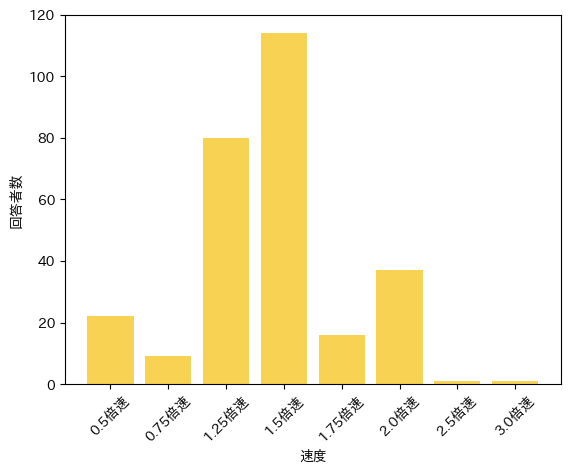

In [13]:
# 音声メディア聴取で最もよく使う再生時間を教えてください。
# 設問6で「いいえ」と答えた@0.5倍速@0.75倍速@1.25倍速@1.5倍速@1.75倍速@2.0倍速@2.5倍速@3.0倍速@それ以上
df_Q7 = df_Q7[~(df_Q7["Answerer_ID"].isin(no_listening_id))]
df_Q7_t = df_Q7[~(df_Q7["Answerer_ID"].isin(no_answerer_id))]
df_Q7_tr = df_Q7_t[~df_Q7_t['Answer'].str.contains("設問6で「いいえ」と答えた")]
total_rows_Q7_tr = df_Q7_tr.shape[0]
answer_percentage_Q7_tr = df_Q7_tr.groupby("Answer").size().div(
    total_rows_Q7_tr).mul(100).round(2).reset_index(name='percentage')
answer_num_Q7_tr = df_Q7_tr.groupby(
    "Answer").size().reset_index(name='num_of_rows')
answer_percentage_Q7 = pd.merge(answer_percentage_Q7_tr, answer_num_Q7_tr, on='Answer')

plt.bar(answer_percentage_Q7["Answer"],
        answer_percentage_Q7["num_of_rows"], color='#F8D353')
plt.xlabel("速度")
plt.ylabel("回答者数")
plt.xticks(rotation=45)
plt.ylim(0, 120, 20)
# plt.subplots_adjust(bottom=0.25)
plt.show()


In [14]:
answer_percentage_Q7


,Answer,percentage,num_of_rows
0,0.5倍速,7.86,22
1,0.75倍速,3.21,9
2,1.25倍速,28.57,80
3,1.5倍速,40.71,114
4,1.75倍速,5.71,16
5,2.0倍速,13.21,37
6,2.5倍速,0.36,1
7,3.0倍速,0.36,1


In [15]:
# 現在倍速再生が実装されていないサービス(radikoなど)についてどのように考えますか。
# 倍速再生機能が欲しい@倍速再生機能は必要ない
answer_percentage_Q8 = df_Q8.groupby("Answer").size().div(
    total_rows_Q8).mul(100).round(2).reset_index(name='percentage')
answer_num_Q8_num = df_Q8.groupby(
    "Answer").size().reset_index(name='num_of_rows')
answer_percentage_Q8 = pd.merge(
    answer_percentage_Q8, answer_num_Q8_num, on='Answer')
answer_percentage_Q8


,Answer,percentage,num_of_rows
0,倍速再生機能が欲しい,43.2,432
1,倍速再生機能は必要ない,56.8,568
